In [1]:
import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime


import DMS2_utils as du
from create_trials_df import create_trials_df_from_dj
from dj_utils import return_date_window, ANIMAL_IDS
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
from plot_days_info import *
from plot_trials_info import *
import plot_utils as pu


# settings
%load_ext autoreload
%autoreload 

dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")


[2023-07-10 09:30:12,347][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-07-10 09:30:12,888][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
date_min, date_max = return_date_window(latest_date=None, n_days_back=20)

In [2]:
# flex_date_min = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")
df = create_trials_df_from_dj(["R610"])

fetched 78 sessions for R610 between 2023-04-13 and 2023-07-09


In [3]:
dm = df.date.min()
dm2 = pd.Timestamp(2023, 4, 15).date()
dmax = df.date.max()
day = df.query("date == @dm")
day2 = df.query("date == @dm2")
dayl = df.query("date == @dmax")

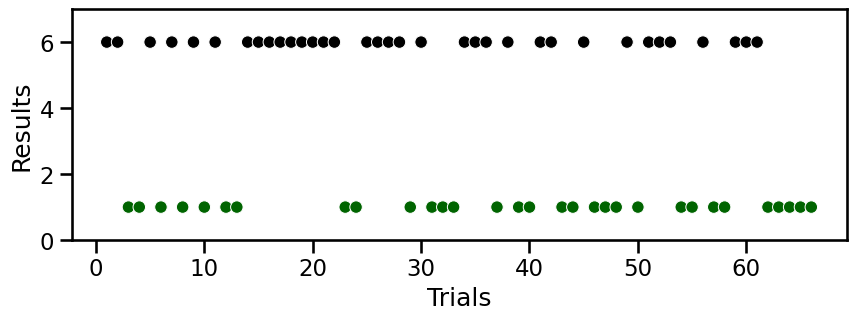

In [4]:
fig, ax = make_fig()
plot_results(day, ax)

In [6]:
df.columns

Index(['trial', 'animal_id', 'date', 'sess_id', 'result', 'hits', 'violations',
       'temperror', 'hit_rate', 'error_rate', 'violation_rate',
       'temp_error_rate', 'n_lpokes', 'n_cpokes', 'n_rpokes', 'trial_dur',
       'valid_early_spoke', 'first_spoke', 'first_lpoke', 'first_rpoke',
       'stage', 'sides', 'SMA_set', 'is_match', 'sa', 'sb', 'stimuli_on',
       'settling_in_dur', 'legal_cbreak_dur', 'pre_dur', 'adj_pre_dur',
       'stimulus_dur', 'delay_dur', 'post_dur', 'sb_extra_dur', 'viol_off_dur',
       'pre_go_dur', 'inter_trial_dur', 'go_type', 'go_dur', 'give_type_set',
       'give_type_imp', 'give_frac', 'give_delay_dur', 'give_light_dur',
       'give_use', 'replay_on', 'timeouts', 'water_delivered',
       'give_water_not_drunk', 'crash_hist', 'l_water_vol', 'r_water_vol',
       'ab_l_prob', 'ab_r_prob', 'ab_beta', 'ab_tau', 'sound_pair',
       'min_time_to_spoke', 'exp_del_tau', 'exp_del_min', 'exp_del_max',
       'n_settling_ins', 'avg_settling_in', 'cpoke_d

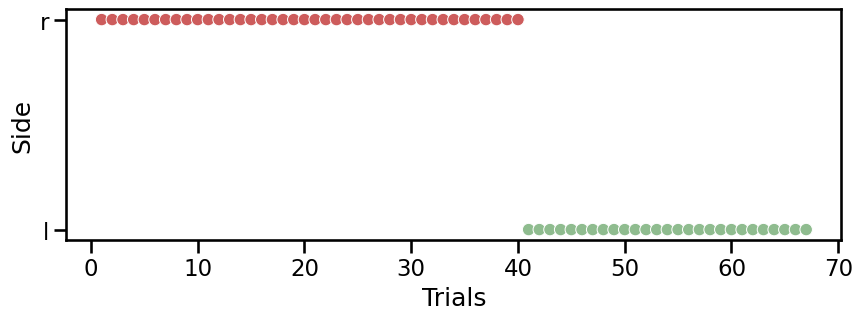

In [5]:
fig, ax = make_fig()

plot_correct_side(day2, ax)

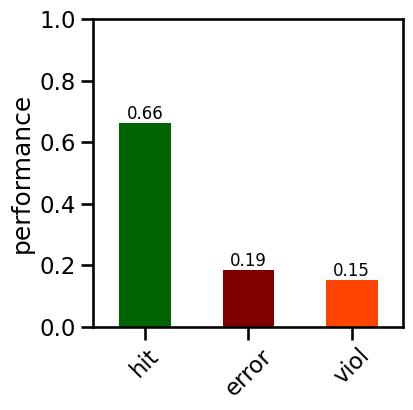

In [6]:
f, a = make_fig((4, 4))

plot_result_summary(dayl, a)

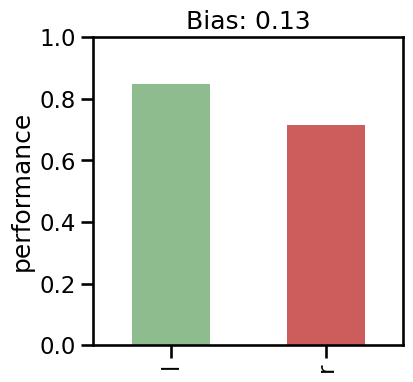

In [7]:
f, ax = make_fig((4, 4))
plot_side_bias_summary(dayl, ax)

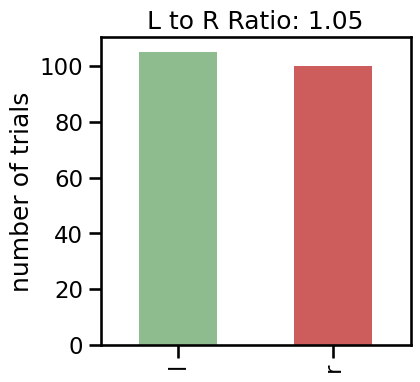

In [9]:
f, ax = make_fig((4, 4))
plot_side_count_summary(dayl, ax)

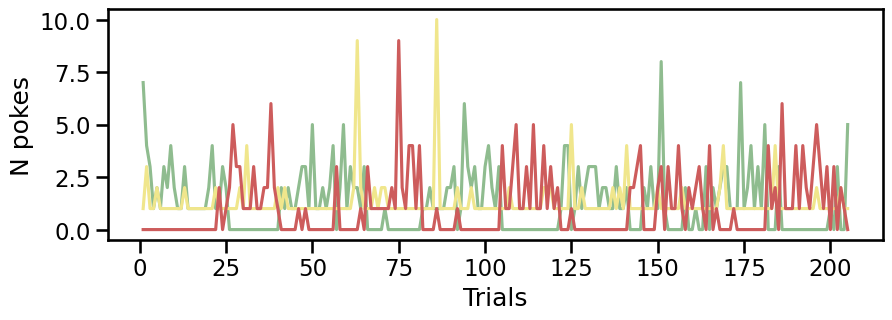

In [44]:
fig, ax = make_fig()
plot_npokes(dayl, ax, title="", legend=False)

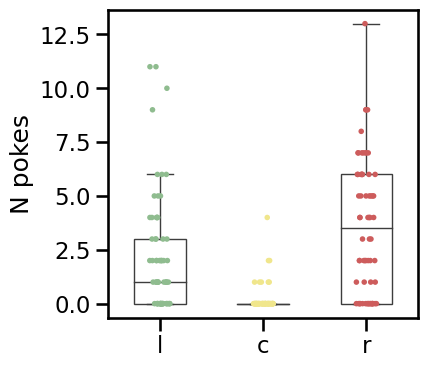

In [84]:
trials_df = day2
fig, ax = make_fig((4, 4))

plot_npokes_summary(trials_df, ax, title="")

### remaining plots
[x] l/r performance (copy over, switch putils)

[x] l/r count (copy over, switch putils)

[x] frac result (copy over, switch putils)

[x] n pokes over time

[x] swarm plot of npokes over time L/R/C

[ ] time to spoke over time (copy over, switch putils)- pretty much just use this to get ready for the next plot

[ ] swarm plot of time to spoke for L/R (add in mean, hue is 
hit/terror)

[ ] iti/trial dur (add in hline w/ mean difference? or diff 
line)

[ ] perf over trials (copy over, switch putils)
 
[ ] water? 


In [18]:
days_df = lazy_load_days_summary_df(
    date_min=date_min, date_max=datetime.today().strftime("%Y-%m-%d"), save_out=True
)

partial dj load with new date min 2023-06-19 -> 2023-07-07
Returning appended df with entries between 2023-06-19 and 2023-07-09
Saved out appended df to c:\Users\JB\github\jbreda_animal_training\code\training_performance\days_df.csv


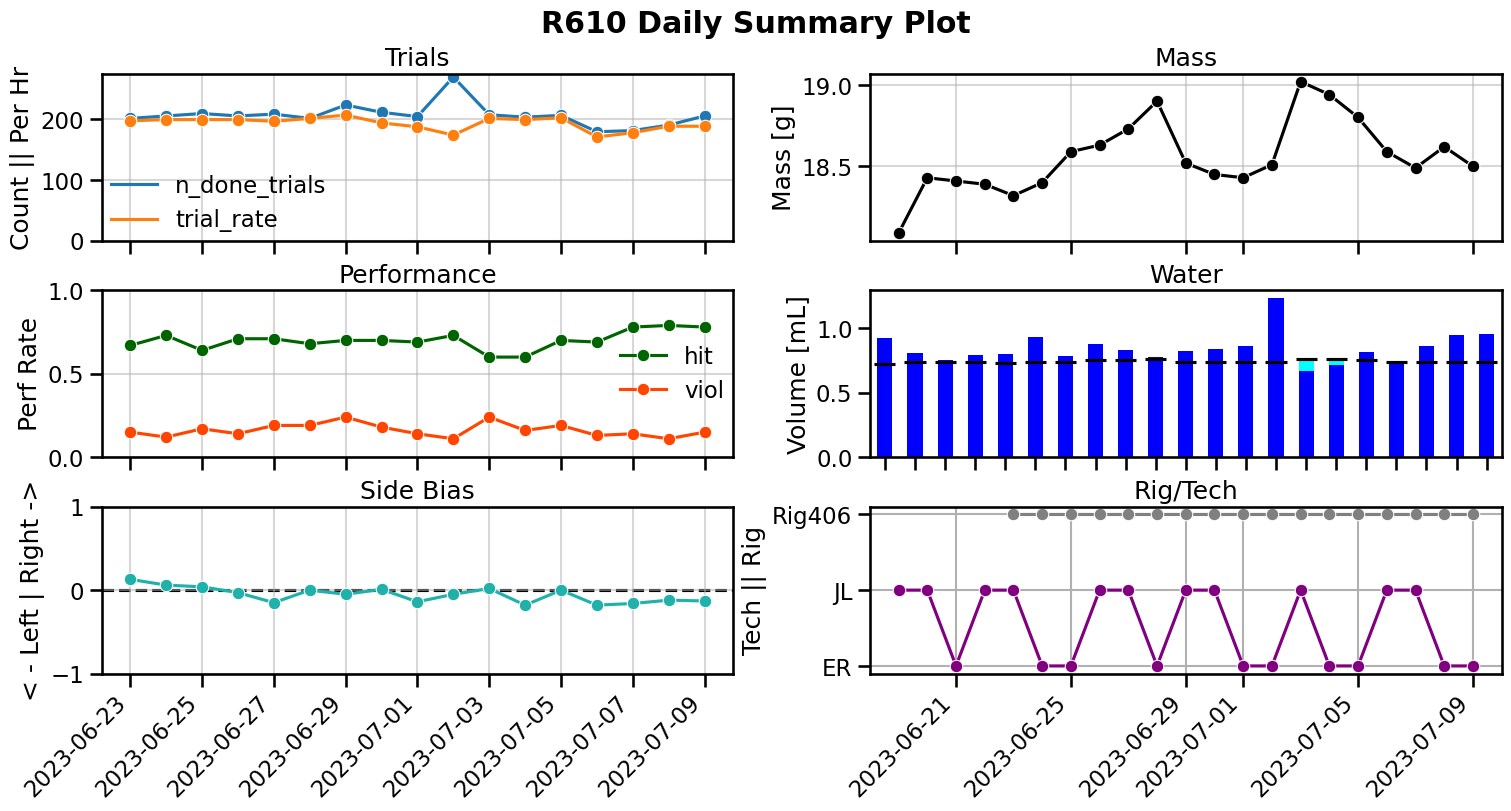

In [19]:
plot_multiday_summary("R610", days_df)

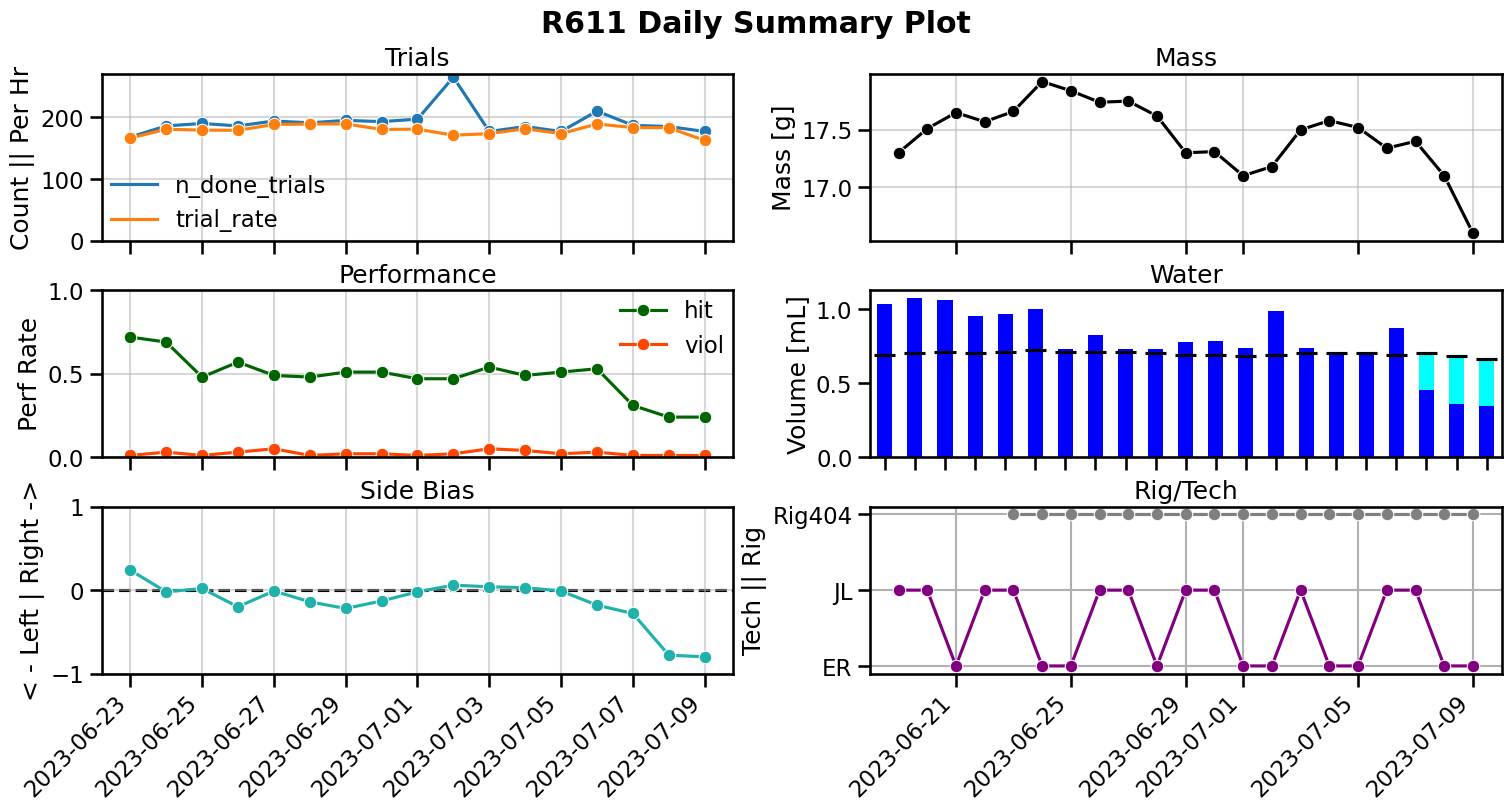

In [20]:
plot_multiday_summary("R611", days_df)

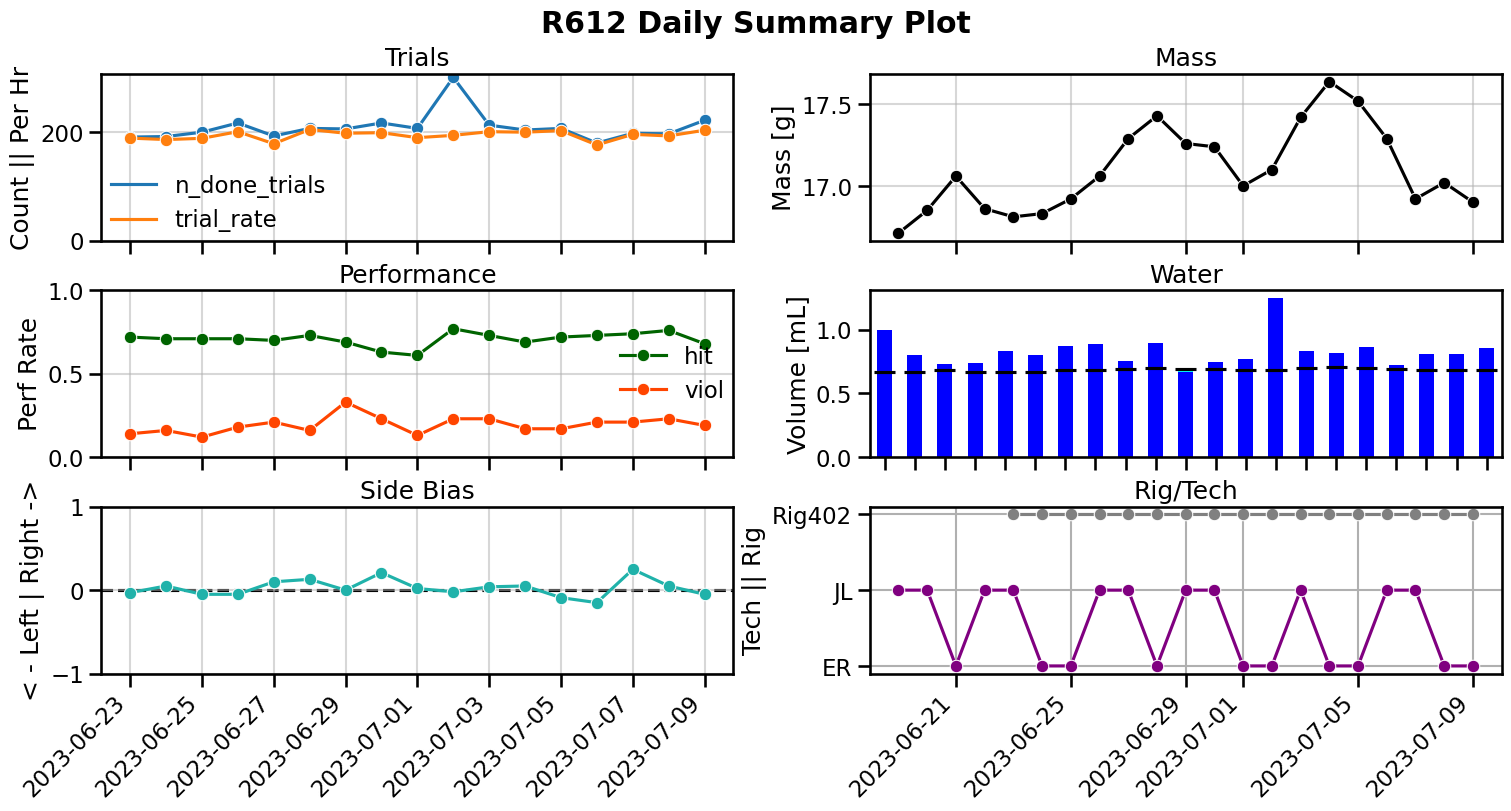

In [21]:
plot_multiday_summary("R612", days_df)

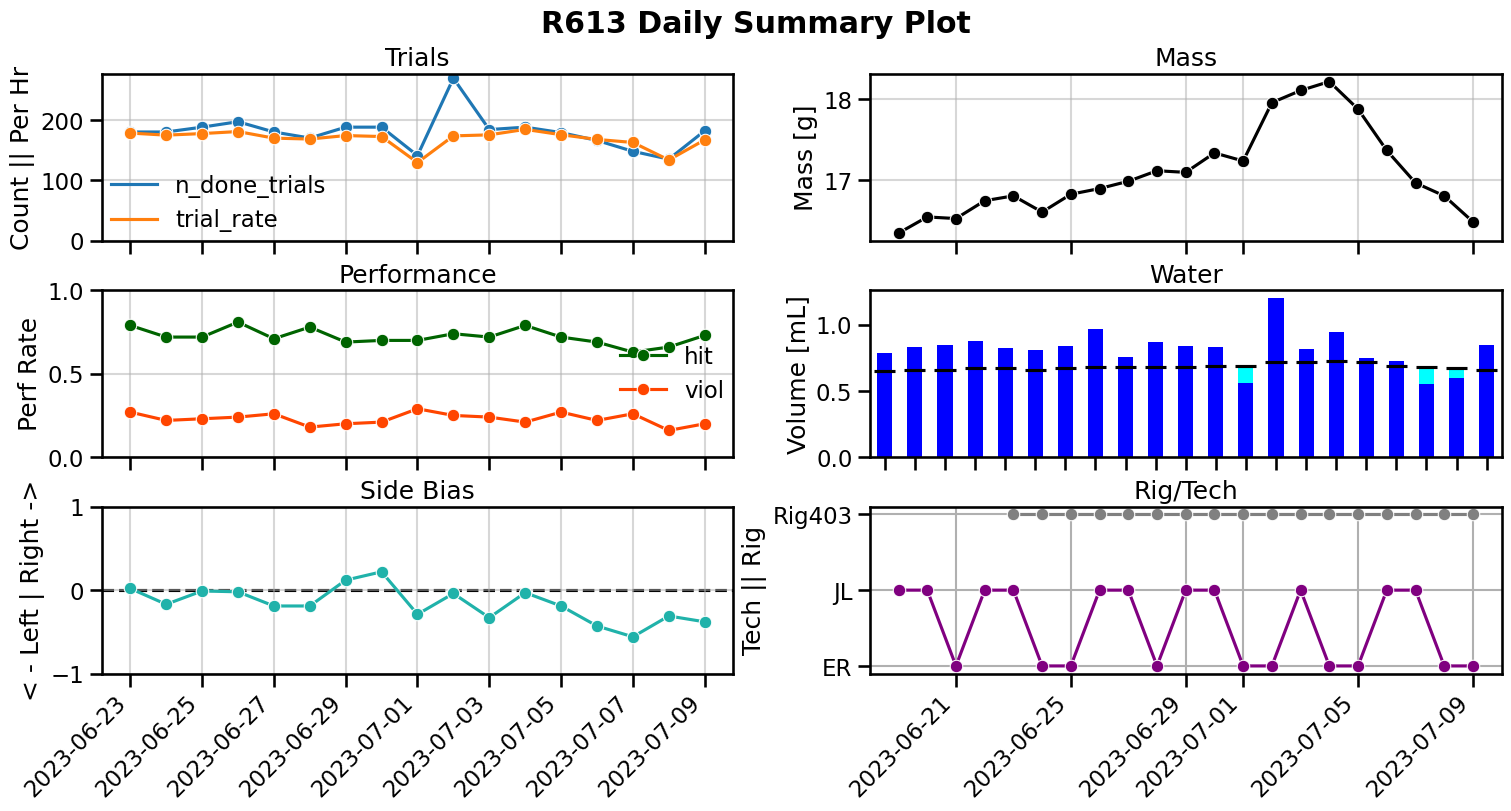

In [22]:
plot_multiday_summary("R613", days_df)

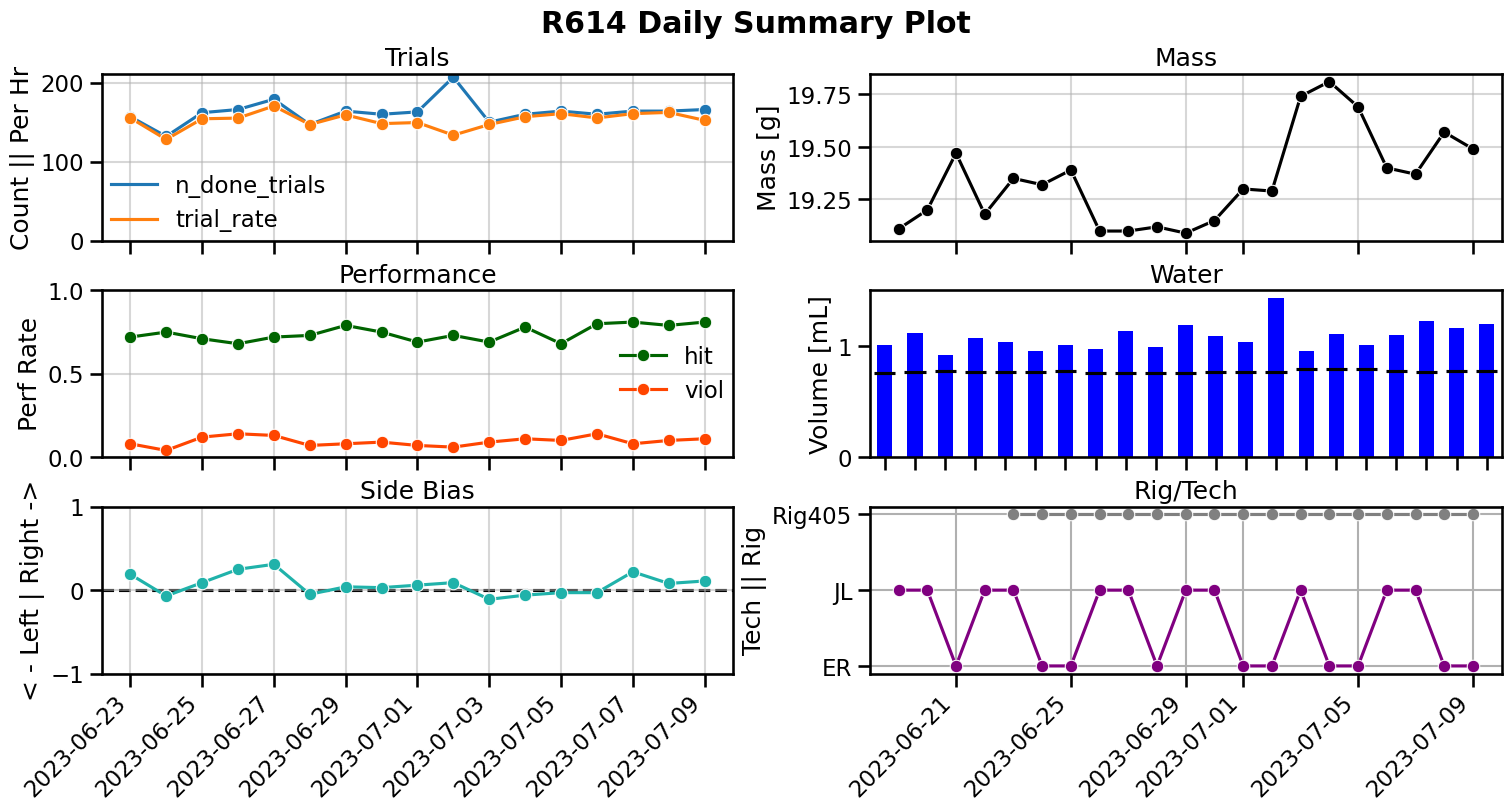

In [23]:
plot_multiday_summary("R614", days_df)

## DEV

In [24]:
# for animal_id, animal_df in days_df.groupby('animal_id'):
#     None
# from plot_days_info import *
# ## Initialize mutli-axis figure
# layout = """
#     AAABBB
#     CCCDDD
#     EEEFFF
# """
# fig = plt.figure(constrained_layout=True, figsize=(15,8))
# ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
# plt.suptitle(f"\nR614 Daily Summary Plot", fontweight="semibold")


# ## Plot
# # left column
# plot_trials(animal_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False)
# plot_performance(animal_df, ax_dict["C"], title="Performance", xaxis_label=False)
# plot_side_bias(animal_df, ax_dict["E"], title="Side Bias", xaxis_label=True)

# # right column
# plot_mass(animal_df, ax_dict["B"], title="Mass", xaxis_label=False)
# plot_water_restriction(animal_df, ax_dict["D"], title="Water", legend=False, xaxis_label=False)
# plot_rig_tech(animal_df, ax_dict["F"], title="Rig/Tech", xaxis_label=True)

# # plots to add
# # stage plot X
# # time to spoke (or cpoke eventually) *
# # delay dur X
# # trial result plot (stacked or unstacked option, unstacked might be better) X
# # antibias params X
# ## eventually!
# # sessions start time
# # pre go/ viol off X
# # settling, pre go, sa, delay, sb, post sb times across days X
# add go cue dur if go is on?
# # give info, sma info, etc (maybe on oneof those dot plots)
# #
# # stimulus information